Importamos los datos 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

df = pd.read_excel("TEG.xlsx")
df.head()

,ID Equipo,Zona,Horas,Amp,VDC
0,1,Sierra,190,8.88,24.39
1,2,Sierra,210,8.88,24.81
2,3,Costa,200,8.93,24.06
3,4,Costa,230,8.93,24.77
4,5,Costa,310,8.99,24.40


Verificamos que todos los datos sen no nulos

In [3]:
df.info() #Como podemos verificar tenemos 200 filas de las cuales ninguna es un valor no nulo, ademas de tener una columna la cual es de tipo object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID Equipo  200 non-null    int64  
 1   Zona       200 non-null    object 
 2   Horas      200 non-null    int64  
 3   Amp        200 non-null    float64
 4   VDC        200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


Graficamos el estado de los datos 

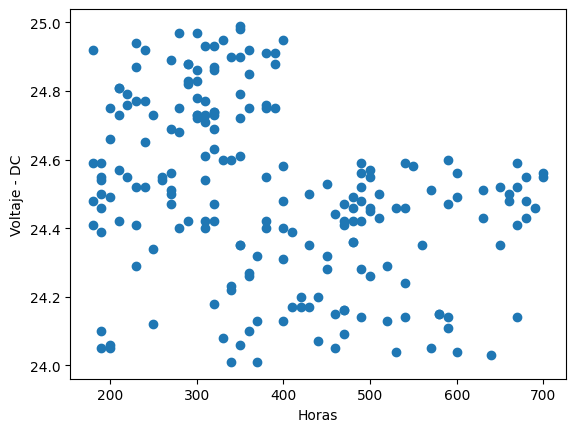

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['Horas'], df['VDC'])
plt.xlabel('Horas')
plt.ylabel('Voltaje - DC')
plt.show()

Realizamos la visualizacion por variable costa y sierra


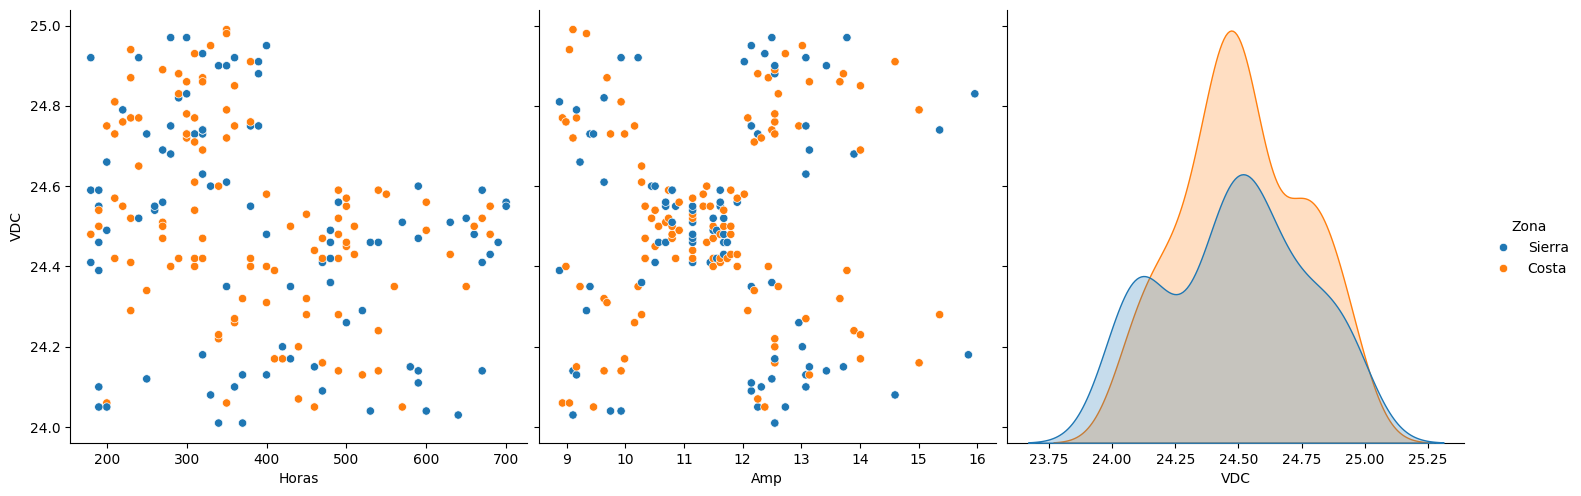

In [5]:
sns.pairplot(df,x_vars = ['Horas', 'Amp', 'VDC'], y_vars = 'VDC', height=5, hue = 'Zona')

Comvertimos el dato de  "Zona" a un valor numerico, esto para poder analizar posibles correlaciones con esta varaible

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Zona'] = df[['Zona']].apply(LE.fit_transform)# vemos que el dato de sierra es remplazado con el numero 1 y el dato costa es remplazado por e numero 0
df.head()

,ID Equipo,Zona,Horas,Amp,VDC
0,1,1,190,8.88,24.39
1,2,1,210,8.88,24.81
2,3,0,200,8.93,24.06
3,4,0,230,8.93,24.77
4,5,0,310,8.99,24.40


Volvemos a verificar el estado y tipo de datos que tenemos en el data frame

In [8]:
df.info() # como notamos todos las 200 filas de las 5 columnas son valores numericos, de tal manera que podemos trabajar y analizar la correlacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID Equipo  200 non-null    int64  
 1   Zona       200 non-null    int32  
 2   Horas      200 non-null    int64  
 3   Amp        200 non-null    float64
 4   VDC        200 non-null    float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 7.2 KB


Graficamos la correlacion con un mapa de calor bastante iteractiva

<Axes: >

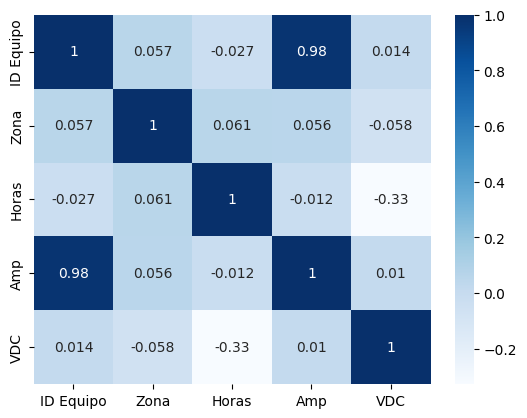

In [9]:
sns.heatmap(df.corr(),annot=True, cmap='Blues')

De este modo eliminamos la columna "Id Equipo" y "zona"


In [10]:
ds = df.copy()
ds = ds.drop(['ID Equipo', 'Zona'], axis=1)
ds.head()#Nuevo data frame sin las columnas id equipo y zona

,Horas,Amp,VDC
0,190,8.88,24.39
1,210,8.88,24.81
2,200,8.93,24.06
3,230,8.93,24.77
4,310,8.99,24.40


#Obtenemos el numero optimo de closter mediante el metodo del codo de jambu

Numero optimo de cluster mediante el metodo del codo

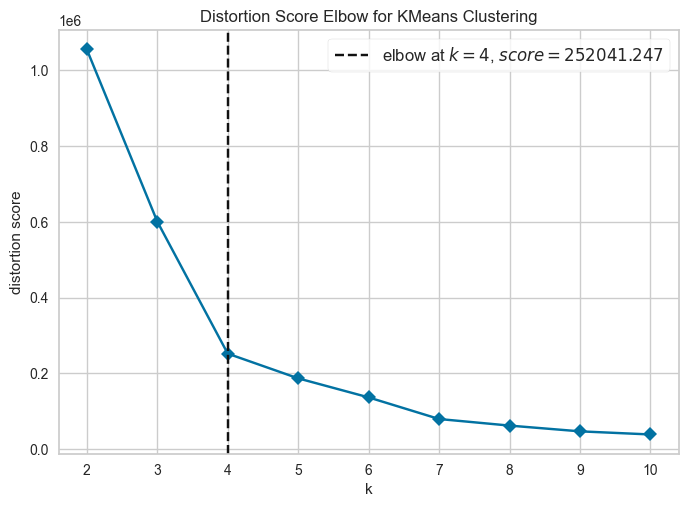

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
KEL = KElbowVisualizer(KMeans(n_init='auto'), timings=False, locate_elbow=True)
KEL.fit(ds)
KEL.show()
## de ese modo optenemos el numero de claster 4

Graficamos los cluster optimos en 2D

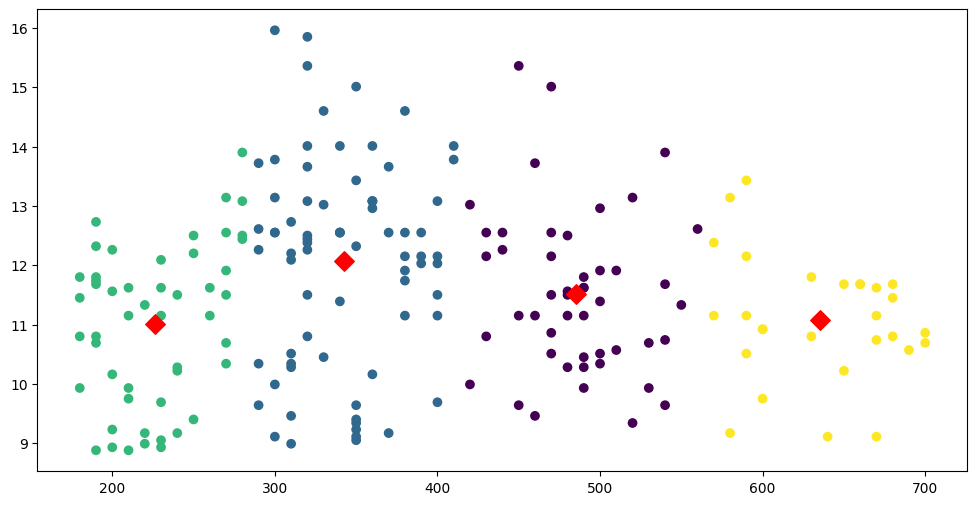

In [20]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
modelo = KMeans(n_clusters=4, n_init='auto')
modelo.fit(ds)
labels = modelo.predict(ds)
centroids = modelo.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.figure(figsize=(12,6))
plt.scatter(df['Horas'], df['Amp'], c=labels)
plt.scatter(centroids_x,centroids_y, marker='D', s=99, c='r')
plt.show()

In [15]:
modelo.cluster_centers_
cc = pd.DataFrame(modelo.cluster_centers_, columns = ['A', 'B', 'C'])
cc.head()

,A,B,C
0,337.236842,12.076842,24.615132
1,480.408163,11.591633,24.345510
2,632.758621,11.135172,24.383793
3,221.304348,10.832174,24.556304


Visualizamos los labels generados

In [18]:
labels

array([3, 3, 3, 3, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 3, 3, 0, 3, 1, 0, 0, 3,
       1, 0, 1, 1, 0, 0, 0, 3, 2, 3, 1, 1, 3, 3, 1, 0, 0, 3, 2, 3, 1, 1,
       0, 3, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 3, 3, 2, 2, 1, 0, 2,
       1, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 0, 3, 3, 1,
       1, 0, 3, 2, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 3, 0, 3, 2, 3, 3, 1, 0, 1, 3, 1, 0, 0, 3, 0, 1, 2, 1, 0, 0, 0,
       3, 0, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

Añadimos la columna labels dentro del data frame ds

In [37]:
da = ds.copy()
ds['labels'] = labels
ds.head()

,Horas,Amp,VDC,labels
0,190,8.88,24.39,2
1,210,8.88,24.81,2
2,200,8.93,24.06,2
3,230,8.93,24.77,2
4,310,8.99,24.40,1


Graficamos los cluster optimos en 3D

In [38]:
import plotly.express as px
fig = px.scatter_3d(data_frame=ds, x='Horas', y='Amp', z='VDC',color='labels')
fig.update_traces(marker_size=5)
# Una capa mas (Centroides)
fig.add_trace(px.scatter_3d(data_frame=cc, x='A', y='B', z='C').update_traces(marker=dict(symbol='cross', color='red')).data[0])
fig.show()